<a href="https://colab.research.google.com/github/aweeeaja/JST-Neural-Network-/blob/main/CNN_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from keras.models import Model, Sequential
from keras import layers

from tensorflow.keras.applications import VGG19


In [ ]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def visualize_all(history, epochs_to_display):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    for epoch in epochs_to_display:
        axs[0].plot(epoch, acc[epoch - 1], 'ro')  # Menampilkan titik merah untuk training accuracy pada epoch tertentu
        axs[0].plot(epoch, val_acc[epoch - 1], 'bo')  # Menampilkan titik biru untuk validation accuracy pada epoch tertentu

        axs[1].plot(epoch, loss[epoch - 1], 'ro')  # Menampilkan titik merah untuk training loss pada epoch tertentu
        axs[1].plot(epoch, val_loss[epoch - 1], 'bo')  # Menampilkan titik biru untuk validation loss pada epoch tertentu

    axs[0].plot(epochs, acc, 'r-', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b-', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r-', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b-', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Contoh penggunaan
epochs_to_display = [10, 20, 30, 40, 50]  # Misalnya, ingin menampilkan visualisasi untuk epoch 10, 20, 30, 40, dan 50


In [ ]:
import os
import shutil

 # use this function for preparing data
training_dir="/content/drive/MyDrive/perceptron/CNN/Flowers Multiclass Classification/train"
validation_dir="/content/drive/MyDrive/perceptron/CNN/Flowers Multiclass Classification/validation"
test_dir="/content/drive/MyDrive/perceptron/CNN/Flowers Multiclass Classification/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(180, 180),  # The dimensions to which all images found will be resized
        seed=42,
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        seed=42,
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [ ]:
# augmented train dataset
augmented_train_set,validation_set=prep_data(True)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
# not augmented train set
straight_train_set,validation_set=prep_data(False)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
import os
import matplotlib.pyplot as plt

# Eğitim setindeki sınıf dağılımını hesapla
train_class_counts = {}
for class_folder in os.listdir(training_dir):
    class_path = os.path.join(training_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# Doğrulama setindeki sınıf dağılımını hesapla
validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

Training set Distribution:
{'sunflowers': 673, 'daisy': 627, 'dandelion': 909, 'roses': 625, 'tulips': 773}
Validation set Distribution:
{'sunflowers': 16, 'dandelion': 16, 'daisy': 16, 'roses': 16, 'tulips': 16}


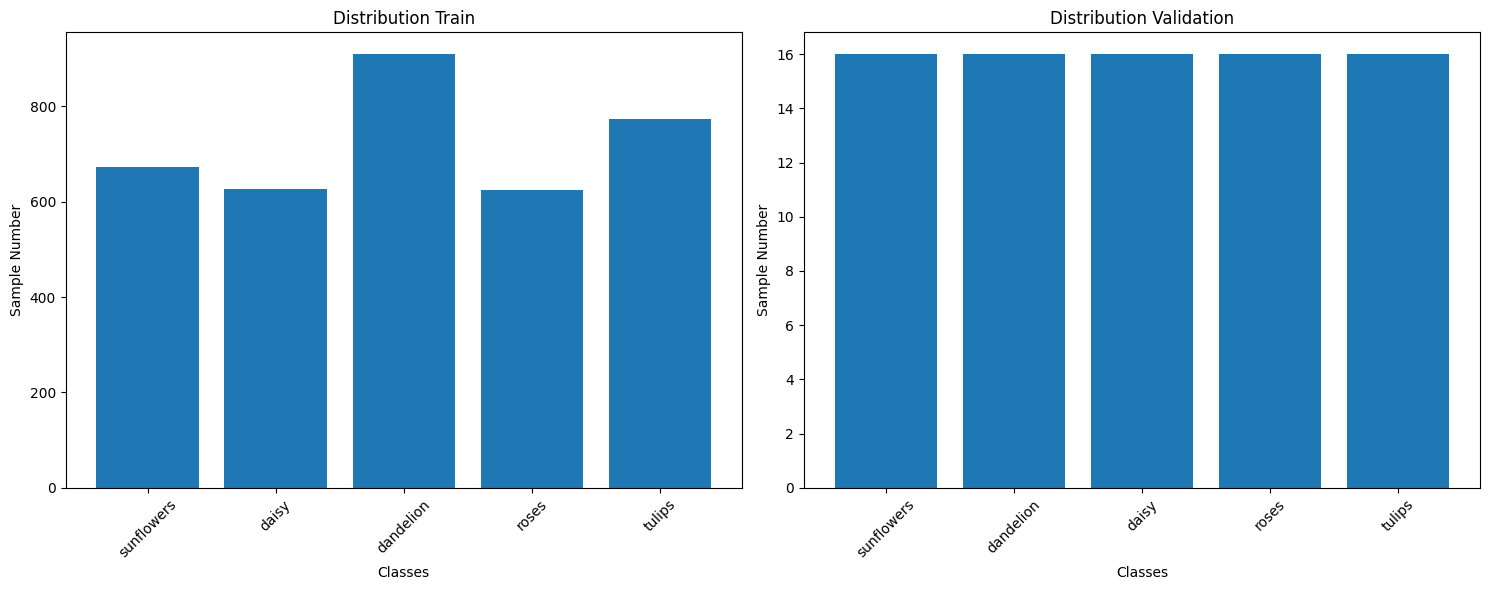

In [ ]:
import matplotlib.pyplot as plt

# Eğitim seti sınıf dağılımı için bar grafik oluştur
plt.figure(figsize=(15, 6))

# Eğitim seti sınıf dağılımı için subplot 1
plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Distribution Train')
plt.xlabel('Classes')
plt.ylabel('Sample Number')
plt.xticks(rotation=45)

# Doğrulama seti sınıf dağılımı için subplot 2
plt.subplot(1, 2, 2)
plt.bar(validation_class_counts.keys(), validation_class_counts.values())
plt.title('Distribution Validation')
plt.xlabel('Classes')
plt.ylabel('Sample Number')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
images,labels=straight_train_set.next()

class_names = straight_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

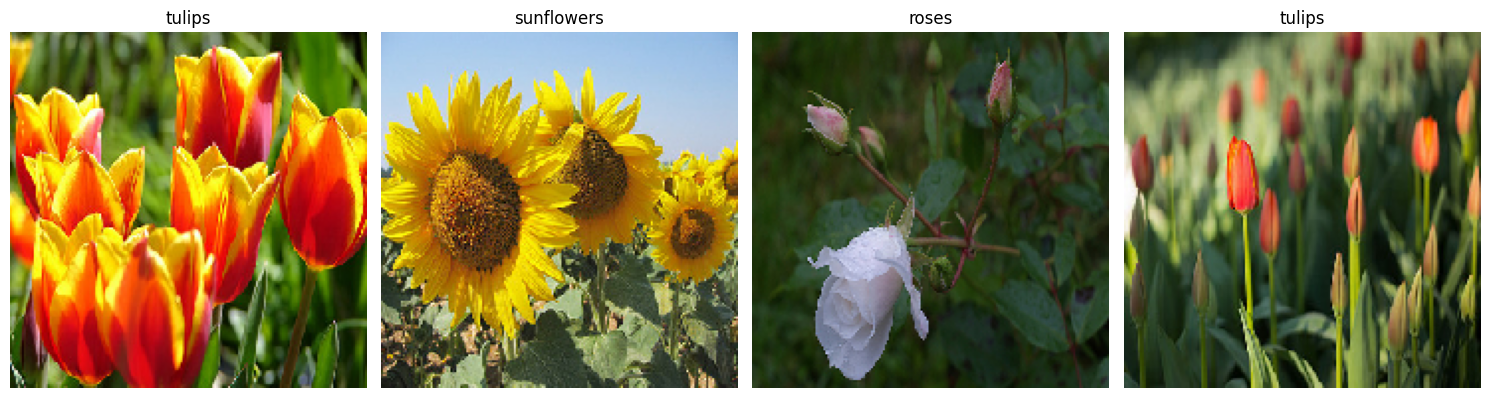

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# augmented dataset
images,labels=augmented_train_set.next()

class_names = augmented_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

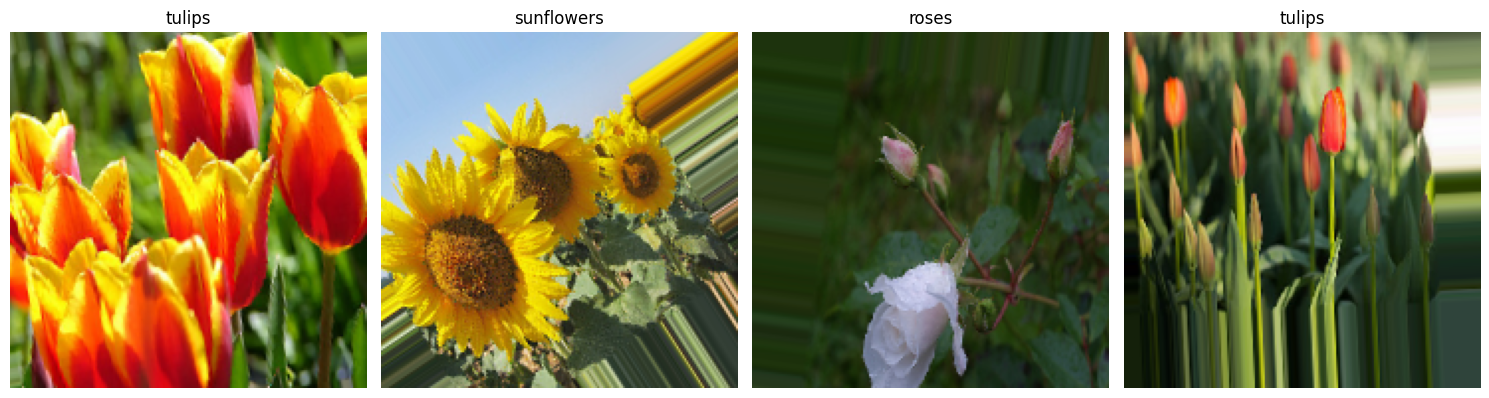

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# **PERCOBAAN 1**


In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

for layer in base_model.layers:
  layer.trainable = False
# for layer in base_model.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_15 (Dense)            (None, 512)               6554112   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

In [ ]:
vgg19_1 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
226/226 [==============================] - 64s 273ms/step - loss: 1.7797 - accuracy: 0.2010 - val_loss: 1.5801 - val_accuracy: 0.4000
Epoch 2/27
226/226 [==============================] - 70s 311ms/step - loss: 1.6500 - accuracy: 0.2174 - val_loss: 1.5727 - val_accuracy: 0.3750
Epoch 3/27
226/226 [==============================] - 55s 242ms/step - loss: 1.6109 - accuracy: 0.2484 - val_loss: 1.5572 - val_accuracy: 0.3625
Epoch 4/27
226/226 [==============================] - 53s 235ms/step - loss: 1.5844 - accuracy: 0.2650 - val_loss: 1.5242 - val_accuracy: 0.4375
Epoch 5/27
226/226 [==============================] - 56s 248ms/step - loss: 1.5663 - accuracy: 0.2692 - val_loss: 1.5177 - val_accuracy: 0.3625
Epoch 6/27
226/226 [==============================] - 54s 239ms/step - loss: 1.5339 - accuracy: 0.3030 - val_loss: 1.4562 - val_accuracy: 0.4375
Epoch 7/27
226/226 [==============================] - 56s 249ms/step - loss: 1.4961 - accuracy: 0.3402 - val_loss: 1.4054 - val_ac

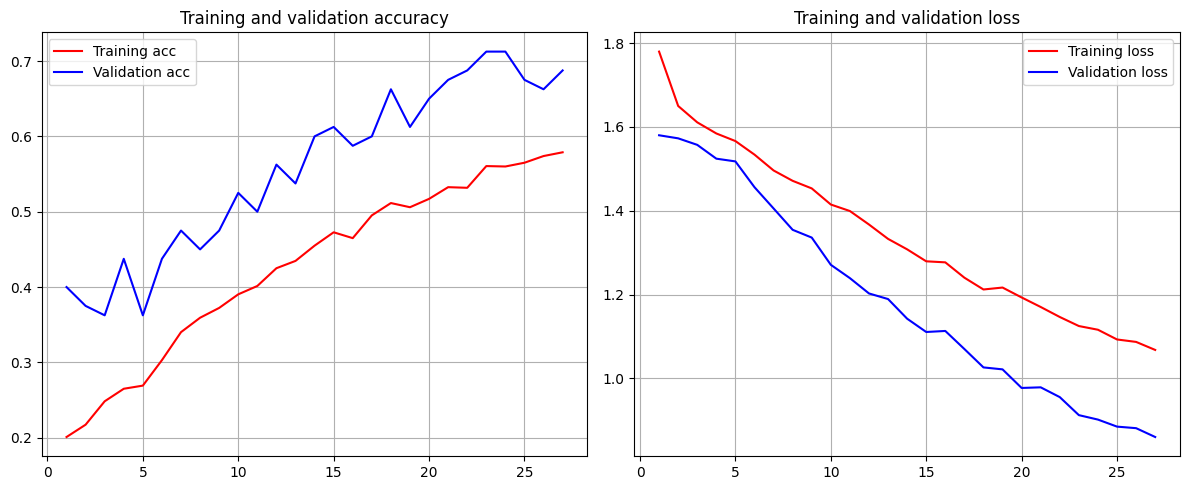

In [ ]:
visualize(vgg19_1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 9s 3s/step
Akurasi: 72.00%
F1 Score: 71.91%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.90      0.90      0.90        10
   dandelion       0.62      0.80      0.70        10
       roses       0.78      0.70      0.74        10
  sunflowers       0.67      0.60      0.63        10
      tulips       0.67      0.60      0.63        10

    accuracy                           0.72        50
   macro avg       0.73      0.72      0.72        50
weighted avg       0.73      0.72      0.72        50



# **PERCOBAAN 2**

In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block1_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0         
                                                                 
 dense_25 (Dense)            (None, 512)               6554112   
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)              

In [ ]:
vgg19_2 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
226/226 [==============================] - 110s 282ms/step - loss: 1.6782 - accuracy: 0.2440 - val_loss: 1.5197 - val_accuracy: 0.3500
Epoch 2/27
226/226 [==============================] - 65s 289ms/step - loss: 1.5057 - accuracy: 0.3249 - val_loss: 1.3413 - val_accuracy: 0.4250
Epoch 3/27
226/226 [==============================] - 63s 280ms/step - loss: 1.4043 - accuracy: 0.3707 - val_loss: 1.2437 - val_accuracy: 0.6000
Epoch 4/27
226/226 [==============================] - 65s 285ms/step - loss: 1.3189 - accuracy: 0.4153 - val_loss: 1.1056 - val_accuracy: 0.6500
Epoch 5/27
226/226 [==============================] - 64s 284ms/step - loss: 1.2323 - accuracy: 0.4533 - val_loss: 1.0656 - val_accuracy: 0.4875
Epoch 6/27
226/226 [==============================] - 64s 284ms/step - loss: 1.1610 - accuracy: 0.4927 - val_loss: 0.9930 - val_accuracy: 0.7625
Epoch 7/27
226/226 [==============================] - 65s 287ms/step - loss: 1.0718 - accuracy: 0.5448 - val_loss: 0.7867 - val_a

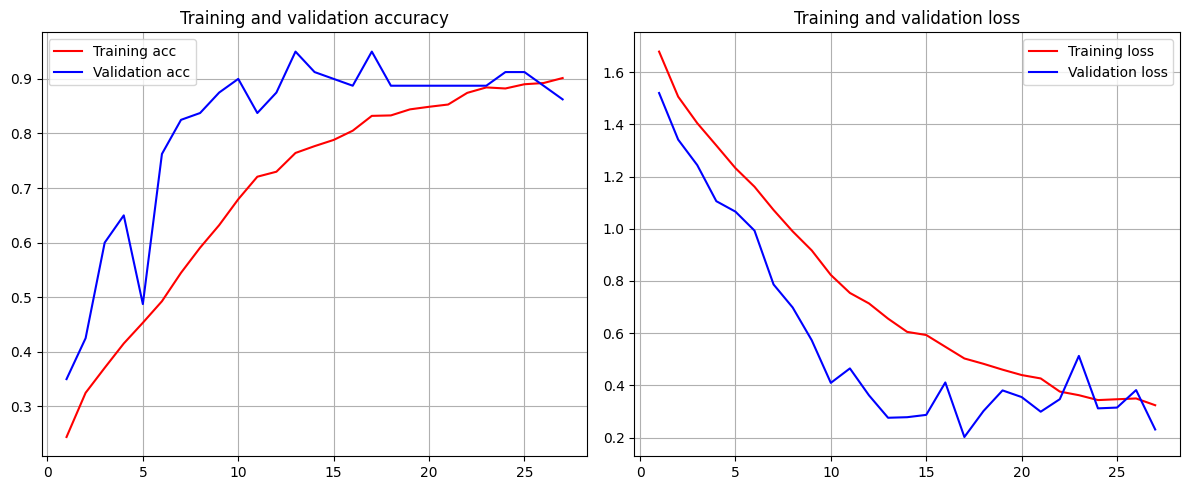

In [ ]:
visualize(vgg19_2)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 77ms/step
Akurasi: 84.00%
F1 Score: 83.44%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.77      1.00      0.87        10
   dandelion       1.00      0.90      0.95        10
       roses       0.69      0.90      0.78        10
  sunflowers       1.00      0.90      0.95        10
      tulips       0.83      0.50      0.62        10

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.83        50
weighted avg       0.86      0.84      0.83        50



# **PERCOBAAN 3**

In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block2_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_6 (Flatten)         (None, 12800)             0         
                                                                 
 dense_30 (Dense)            (None, 512)               6554112   
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 128)              

In [ ]:
vgg19_3 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
226/226 [==============================] - 64s 265ms/step - loss: 1.6978 - accuracy: 0.2013 - val_loss: 1.6073 - val_accuracy: 0.2750
Epoch 2/27
226/226 [==============================] - 60s 265ms/step - loss: 1.6109 - accuracy: 0.1977 - val_loss: 1.6007 - val_accuracy: 0.2625
Epoch 3/27
226/226 [==============================] - 62s 273ms/step - loss: 1.5907 - accuracy: 0.2090 - val_loss: 1.5823 - val_accuracy: 0.2250
Epoch 4/27
226/226 [==============================] - 59s 262ms/step - loss: 1.5433 - accuracy: 0.2406 - val_loss: 1.4214 - val_accuracy: 0.2125
Epoch 5/27
226/226 [==============================] - 61s 269ms/step - loss: 1.5048 - accuracy: 0.2828 - val_loss: 1.3932 - val_accuracy: 0.3250
Epoch 6/27
226/226 [==============================] - 60s 263ms/step - loss: 1.4707 - accuracy: 0.3180 - val_loss: 1.3796 - val_accuracy: 0.3625
Epoch 7/27
226/226 [==============================] - 60s 267ms/step - loss: 1.4487 - accuracy: 0.3465 - val_loss: 1.3809 - val_ac

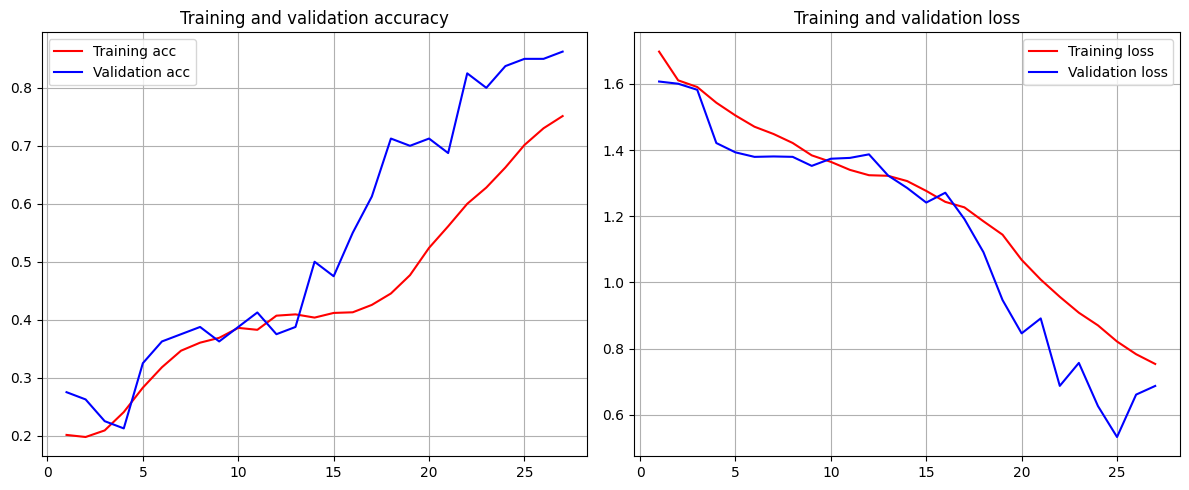

In [ ]:
visualize(vgg19_3)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 77ms/step
Akurasi: 72.00%
F1 Score: 70.86%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.67      1.00      0.80        10
   dandelion       1.00      0.80      0.89        10
       roses       0.75      0.30      0.43        10
  sunflowers       0.89      0.80      0.84        10
      tulips       0.50      0.70      0.58        10

    accuracy                           0.72        50
   macro avg       0.76      0.72      0.71        50
weighted avg       0.76      0.72      0.71        50

Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 62ms/step
Akurasi: 72.00%
F1 Score: 70.86%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.67      1.00      0.80        10
   dandelion       1.00      0.80      0.89        10
       roses       0.75      0.30      0.43        10


# **PERCOBAAN 4**

In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_7 (Flatten)         (None, 12800)             0         
                                                                 
 dense_35 (Dense)            (None, 512)               6554112   
                                                                 
 dropout_28 (Dropout)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)              

In [ ]:
vgg19_4 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
226/226 [==============================] - 62s 251ms/step - loss: 1.6905 - accuracy: 0.2232 - val_loss: 1.5836 - val_accuracy: 0.2125
Epoch 2/27
226/226 [==============================] - 59s 260ms/step - loss: 1.5657 - accuracy: 0.2628 - val_loss: 1.4525 - val_accuracy: 0.2500
Epoch 3/27
226/226 [==============================] - 59s 259ms/step - loss: 1.5210 - accuracy: 0.2842 - val_loss: 1.4209 - val_accuracy: 0.3125
Epoch 4/27
226/226 [==============================] - 57s 252ms/step - loss: 1.4655 - accuracy: 0.3080 - val_loss: 1.3947 - val_accuracy: 0.3375
Epoch 5/27
226/226 [==============================] - 58s 255ms/step - loss: 1.4265 - accuracy: 0.3496 - val_loss: 1.3837 - val_accuracy: 0.3625
Epoch 6/27
226/226 [==============================] - 58s 258ms/step - loss: 1.4043 - accuracy: 0.3768 - val_loss: 1.3693 - val_accuracy: 0.3750
Epoch 7/27
226/226 [==============================] - 58s 255ms/step - loss: 1.3710 - accuracy: 0.3940 - val_loss: 1.4879 - val_ac

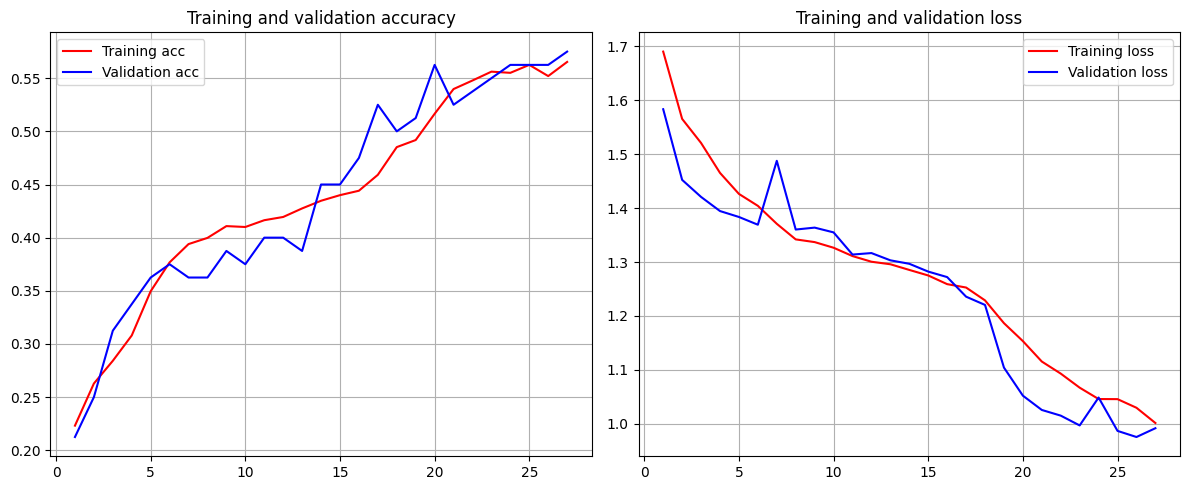

In [ ]:
visualize(vgg19_4)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 77ms/step
Akurasi: 48.00%
F1 Score: 41.18%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.90      0.90      0.90        10
   dandelion       0.80      0.80      0.80        10
       roses       0.00      0.00      0.00        10
  sunflowers       0.00      0.00      0.00        10
      tulips       0.24      0.70      0.36        10

    accuracy                           0.48        50
   macro avg       0.39      0.48      0.41        50
weighted avg       0.39      0.48      0.41        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **PERCOBAAN 5**

In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_9 (Flatten)         (None, 12800)             0         
                                                                 
 dense_45 (Dense)            (None, 512)               6554112   
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_46 (Dense)            (None, 256)               131328    
                                                                 
 dropout_37 (Dropout)        (None, 256)               0         
                                                                 
 dense_47 (Dense)            (None, 128)              

In [ ]:
vgg19_5 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
226/226 [==============================] - 63s 262ms/step - loss: 1.7072 - accuracy: 0.2359 - val_loss: 1.4934 - val_accuracy: 0.4125
Epoch 2/27
226/226 [==============================] - 55s 242ms/step - loss: 1.5197 - accuracy: 0.3116 - val_loss: 1.3775 - val_accuracy: 0.5375
Epoch 3/27
226/226 [==============================] - 52s 230ms/step - loss: 1.4153 - accuracy: 0.3637 - val_loss: 1.2528 - val_accuracy: 0.6125
Epoch 4/27
226/226 [==============================] - 54s 237ms/step - loss: 1.3213 - accuracy: 0.4147 - val_loss: 1.1248 - val_accuracy: 0.6000
Epoch 5/27
226/226 [==============================] - 51s 226ms/step - loss: 1.2450 - accuracy: 0.4586 - val_loss: 1.1789 - val_accuracy: 0.4625
Epoch 6/27
226/226 [==============================] - 51s 227ms/step - loss: 1.1451 - accuracy: 0.5226 - val_loss: 0.9398 - val_accuracy: 0.6500
Epoch 7/27
226/226 [==============================] - 51s 225ms/step - loss: 1.0704 - accuracy: 0.5586 - val_loss: 0.7655 - val_ac

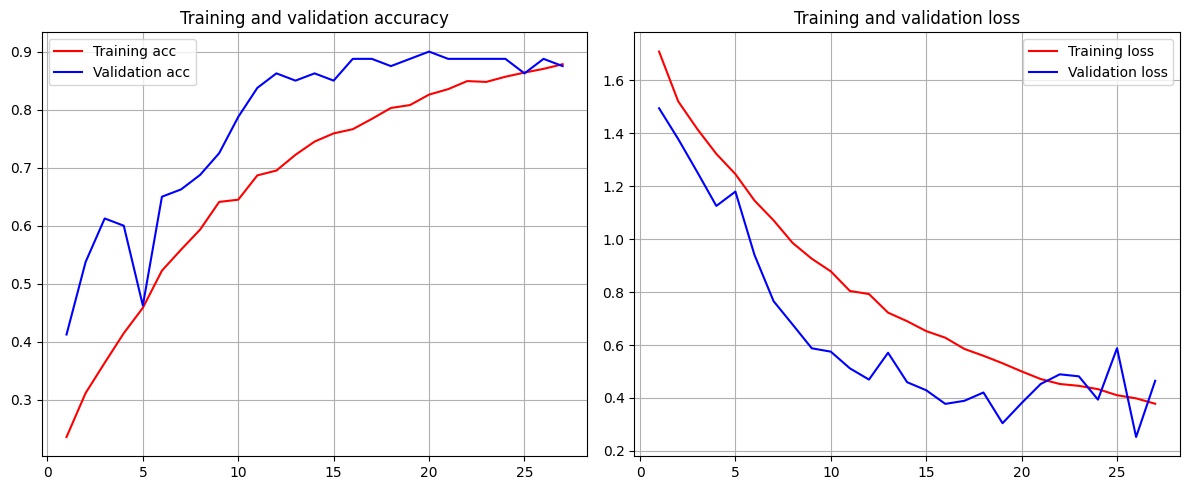

In [ ]:
visualize(vgg19_5)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 60ms/step
Akurasi: 82.00%
F1 Score: 81.44%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       0.89      0.80      0.84        10
       roses       0.78      0.70      0.74        10
  sunflowers       0.83      1.00      0.91        10
      tulips       0.67      0.60      0.63        10

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.81        50
weighted avg       0.82      0.82      0.81        50



# **PERCOBAAN 6**

In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3607 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),

    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 512)               6554112   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [ ]:
vgg19_6 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
226/226 [==============================] - 1361s 6s/step - loss: 1.7347 - accuracy: 0.2151 - val_loss: 1.5685 - val_accuracy: 0.3750
Epoch 2/27
226/226 [==============================] - 52s 230ms/step - loss: 1.6036 - accuracy: 0.2573 - val_loss: 1.4867 - val_accuracy: 0.4875
Epoch 3/27
226/226 [==============================] - 54s 238ms/step - loss: 1.5094 - accuracy: 0.3246 - val_loss: 1.3037 - val_accuracy: 0.4750
Epoch 4/27
226/226 [==============================] - 51s 227ms/step - loss: 1.3921 - accuracy: 0.3948 - val_loss: 1.1154 - val_accuracy: 0.5250
Epoch 5/27
226/226 [==============================] - 51s 227ms/step - loss: 1.2978 - accuracy: 0.4516 - val_loss: 1.0111 - val_accuracy: 0.6625
Epoch 6/27
226/226 [==============================] - 53s 234ms/step - loss: 1.1941 - accuracy: 0.4999 - val_loss: 0.9086 - val_accuracy: 0.7000
Epoch 7/27
226/226 [==============================] - 52s 228ms/step - loss: 1.0471 - accuracy: 0.5672 - val_loss: 0.7359 - val_acc

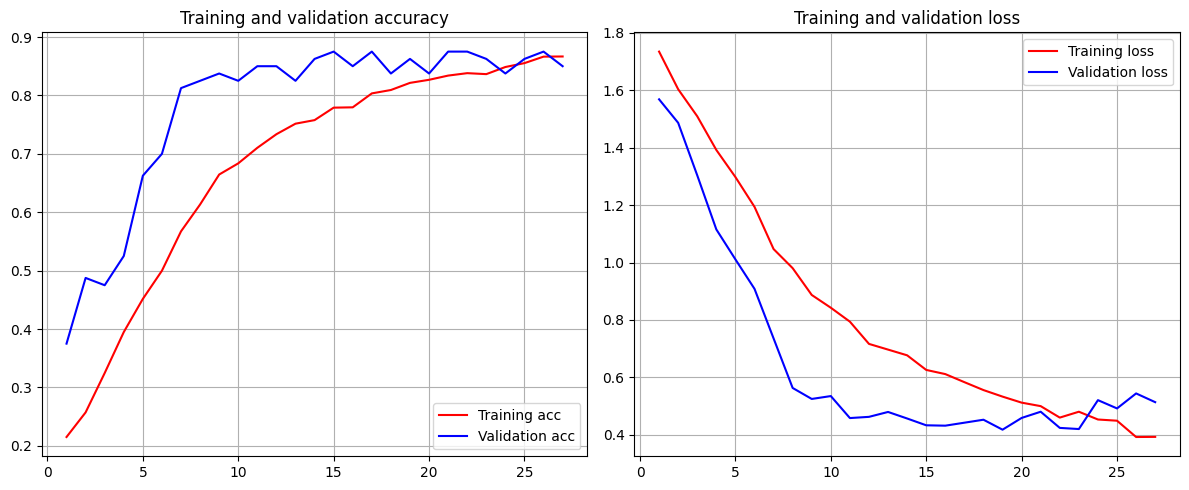

In [ ]:
visualize(vgg19_6)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 19s 6s/step
Akurasi: 80.00%
F1 Score: 79.62%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.90      0.90      0.90        10
   dandelion       0.82      0.90      0.86        10
       roses       0.75      0.60      0.67        10
  sunflowers       0.82      0.90      0.86        10
      tulips       0.70      0.70      0.70        10

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3550 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00003),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               6554112   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [ ]:
vgg19_7 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
222/222 [==============================] - 51s 214ms/step - loss: 1.6215 - accuracy: 0.2552 - val_loss: 1.4389 - val_accuracy: 0.4250
Epoch 2/27
222/222 [==============================] - 47s 211ms/step - loss: 1.3948 - accuracy: 0.3890 - val_loss: 1.0552 - val_accuracy: 0.6250
Epoch 3/27
222/222 [==============================] - 47s 212ms/step - loss: 1.2011 - accuracy: 0.4806 - val_loss: 0.8450 - val_accuracy: 0.7375
Epoch 4/27
222/222 [==============================] - 47s 209ms/step - loss: 0.9930 - accuracy: 0.5924 - val_loss: 0.5863 - val_accuracy: 0.7875
Epoch 5/27
222/222 [==============================] - 47s 211ms/step - loss: 0.8331 - accuracy: 0.6839 - val_loss: 0.4672 - val_accuracy: 0.8125
Epoch 6/27
222/222 [==============================] - 47s 211ms/step - loss: 0.7273 - accuracy: 0.7344 - val_loss: 0.4962 - val_accuracy: 0.8250
Epoch 7/27
222/222 [==============================] - 46s 208ms/step - loss: 0.6885 - accuracy: 0.7651 - val_loss: 0.4449 - val_ac

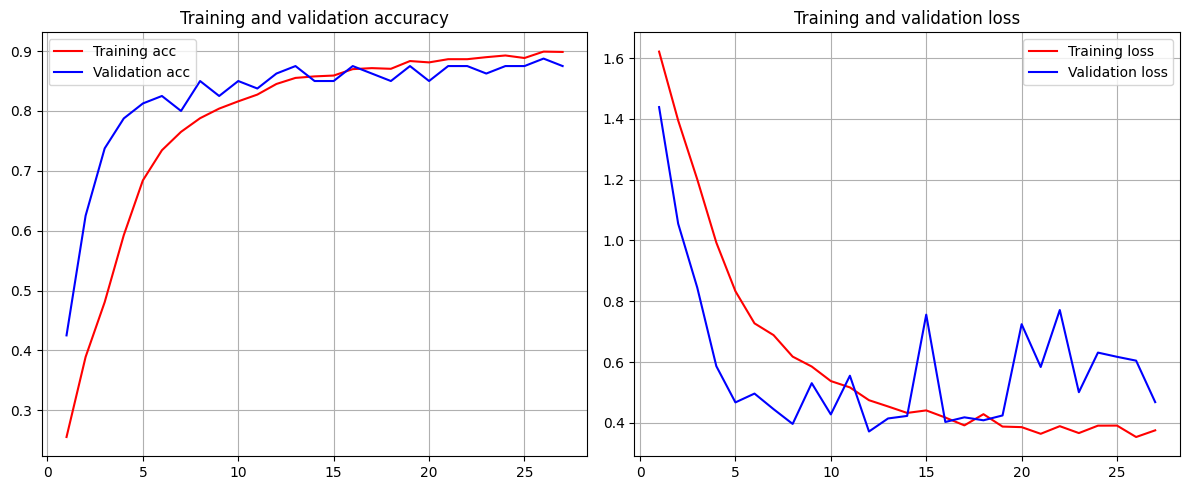

In [ ]:
visualize(vgg19_7)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 10s 3s/step
Akurasi: 88.00%
F1 Score: 87.67%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       0.90      0.90      0.90        10
       roses       0.89      0.80      0.84        10
  sunflowers       0.91      1.00      0.95        10
      tulips       0.78      0.70      0.74        10

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 59ms/step
Akurasi: 88.00%
F1 Score: 87.67%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.91      1.00      0.95        10
   dandelion       0.90      0.90      0.90        10
       roses       0.89      0.80      0.84        10
 

In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3550 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                819264    
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [ ]:
vgg19_8 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
222/222 [==============================] - 50s 211ms/step - loss: 1.6172 - accuracy: 0.2206 - val_loss: 1.5845 - val_accuracy: 0.2750
Epoch 2/27
222/222 [==============================] - 47s 213ms/step - loss: 1.5722 - accuracy: 0.2696 - val_loss: 1.5083 - val_accuracy: 0.3625
Epoch 3/27
222/222 [==============================] - 47s 210ms/step - loss: 1.4894 - accuracy: 0.3194 - val_loss: 1.3929 - val_accuracy: 0.3875
Epoch 4/27
222/222 [==============================] - 47s 211ms/step - loss: 1.3965 - accuracy: 0.3718 - val_loss: 1.3241 - val_accuracy: 0.3875
Epoch 5/27
222/222 [==============================] - 47s 209ms/step - loss: 1.3345 - accuracy: 0.4146 - val_loss: 1.2436 - val_accuracy: 0.4000
Epoch 6/27
222/222 [==============================] - 47s 214ms/step - loss: 1.2765 - accuracy: 0.4248 - val_loss: 1.1841 - val_accuracy: 0.5250
Epoch 7/27
222/222 [==============================] - 48s 218ms/step - loss: 1.2005 - accuracy: 0.4727 - val_loss: 1.1112 - val_ac

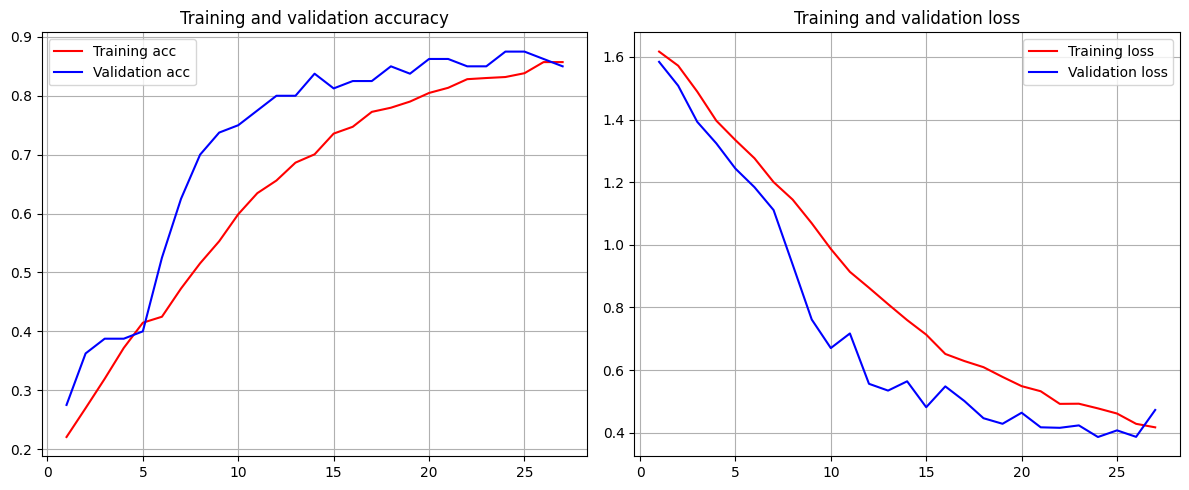

In [ ]:
visualize(vgg19_8)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 1s 95ms/step
Akurasi: 80.00%
F1 Score: 79.72%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.75      0.90      0.82        10
   dandelion       0.80      0.80      0.80        10
       roses       0.73      0.80      0.76        10
  sunflowers       0.90      0.90      0.90        10
      tulips       0.86      0.60      0.71        10

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81      0.80      0.80        50

Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 82ms/step
Akurasi: 80.00%
F1 Score: 79.72%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.75      0.90      0.82        10
   dandelion       0.80      0.80      0.80        10
       roses       0.73      0.80      0.76        10


In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3550 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003),

    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_15 (Dense)            (None, 512)               6554112   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

In [ ]:
vgg19_6 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
222/222 [==============================] - 54s 220ms/step - loss: 1.6944 - accuracy: 0.2141 - val_loss: 1.5424 - val_accuracy: 0.3500
Epoch 2/27
222/222 [==============================] - 47s 211ms/step - loss: 1.4979 - accuracy: 0.3231 - val_loss: 1.1664 - val_accuracy: 0.5625
Epoch 3/27
222/222 [==============================] - 48s 215ms/step - loss: 1.2151 - accuracy: 0.4775 - val_loss: 0.8785 - val_accuracy: 0.6625
Epoch 4/27
222/222 [==============================] - 47s 213ms/step - loss: 0.9710 - accuracy: 0.6158 - val_loss: 0.5787 - val_accuracy: 0.7875
Epoch 5/27
222/222 [==============================] - 47s 213ms/step - loss: 0.7636 - accuracy: 0.7214 - val_loss: 0.4480 - val_accuracy: 0.8625
Epoch 6/27
222/222 [==============================] - 47s 212ms/step - loss: 0.6853 - accuracy: 0.7538 - val_loss: 0.4353 - val_accuracy: 0.8500
Epoch 7/27
222/222 [==============================] - 48s 215ms/step - loss: 0.6111 - accuracy: 0.7839 - val_loss: 0.4419 - val_ac

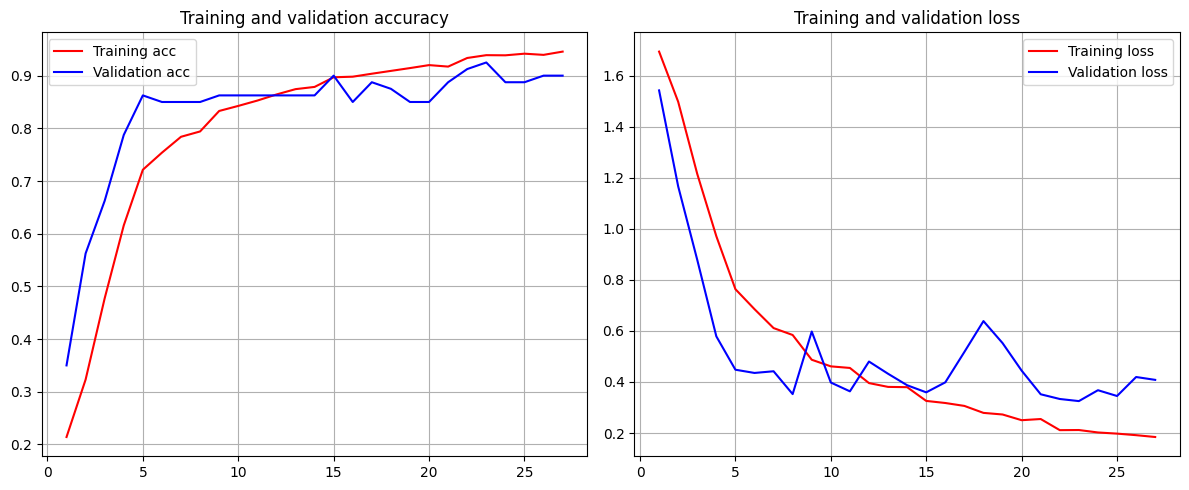

In [ ]:
visualize(vgg19_6)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 71ms/step
Akurasi: 86.00%
F1 Score: 85.98%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.90      0.90      0.90        10
   dandelion       0.82      0.90      0.86        10
       roses       0.89      0.80      0.84        10
  sunflowers       1.00      1.00      1.00        10
      tulips       0.70      0.70      0.70        10

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50

Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 62ms/step
Akurasi: 86.00%
F1 Score: 85.98%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.90      0.90      0.90        10
   dandelion       0.82      0.90      0.86        10
       roses       0.89      0.80      0.84        10


In [ ]:
# augmented train dataset
train_set,validation_set=prep_data(True, batch_size=16)

Found 3550 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [ ]:
base_model = VGG19(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

base_model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
base_model.trainable = True
set_trainable = False

# for layer in base_model.layers:
#   layer.trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003),

    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 256)               3277056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               3

In [ ]:
vgg19_10 = model.fit(
    train_set,
    epochs=27,
    validation_data=validation_set,
    )

Epoch 1/27
222/222 [==============================] - 780s 3s/step - loss: 1.5365 - accuracy: 0.3107 - val_loss: 1.0461 - val_accuracy: 0.6000
Epoch 2/27
222/222 [==============================] - 44s 196ms/step - loss: 1.0535 - accuracy: 0.5837 - val_loss: 0.5564 - val_accuracy: 0.7875
Epoch 3/27
222/222 [==============================] - 46s 207ms/step - loss: 0.7467 - accuracy: 0.7318 - val_loss: 0.4730 - val_accuracy: 0.8500
Epoch 4/27
222/222 [==============================] - 45s 200ms/step - loss: 0.6275 - accuracy: 0.7783 - val_loss: 0.4778 - val_accuracy: 0.8125
Epoch 5/27
222/222 [==============================] - 44s 199ms/step - loss: 0.5386 - accuracy: 0.8172 - val_loss: 0.4547 - val_accuracy: 0.8375
Epoch 6/27
222/222 [==============================] - 45s 200ms/step - loss: 0.4982 - accuracy: 0.8296 - val_loss: 0.4956 - val_accuracy: 0.8000
Epoch 7/27
222/222 [==============================] - 46s 208ms/step - loss: 0.4714 - accuracy: 0.8445 - val_loss: 0.4772 - val_accu

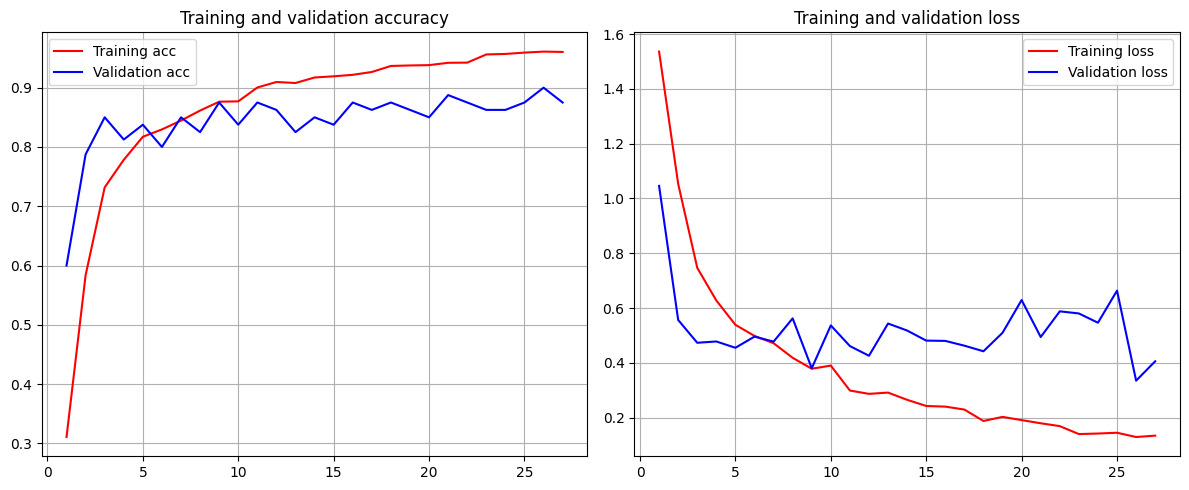

In [ ]:
visualize(vgg19_10)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 10s 3s/step
Akurasi: 84.00%
F1 Score: 83.75%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.82      0.90      0.86        10
   dandelion       0.80      0.80      0.80        10
       roses       0.88      0.70      0.78        10
  sunflowers       0.91      1.00      0.95        10
      tulips       0.80      0.80      0.80        10

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50

Found 50 images belonging to 5 classes.
4/4 [==============================] - 0s 62ms/step
Akurasi: 84.00%
F1 Score: 83.75%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.82      0.90      0.86        10
   dandelion       0.80      0.80      0.80        10
       roses       0.88      0.70      0.78        10
 